In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tableone import TableOne, load_dataset
from datetime import datetime
from Bio import AlignIO
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
ns1 = pd.read_csv("080223-NS1-MEME.csv")
ns2 = pd.read_csv("080223-NS2-MEME.csv")
n = pd.read_csv("080223-N-MEME.csv")
p = pd.read_csv("080223-P-MEME.csv")
sh = pd.read_csv("080223-SH-MEME.csv")
g = pd.read_csv("/Users/estefanyguzman/Downloads/101623-RSVB-G.meme.json.csv")
g_fubar = pd.read_csv("/Users/estefanyguzman/Downloads/101623-RSVB-G.fubar.json.csv")
f = pd.read_csv("/Users/estefanyguzman/Downloads/102223-RSVB-F-meme.csv")
f_fubar = pd.read_csv("/Users/estefanyguzman/Downloads/102223-RSVB-F-fubar.csv")
l = pd.read_csv("080223-L-MEME.csv")
m = pd.read_csv("080223-M-MEME.csv")
m21 = pd.read_csv("080223-M2-1-MEME.csv")
m22 = pd.read_csv("080223-M2-2-MEME.csv")

In [4]:
def plot_lollipop(df, condition_column, value_column, p_val, condition_threshold=0.05, title="Lollipop Plot", x_label="X Axis Label", y_label="Y Axis Label",ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    # Define a color based on the condition
    colors = ['r' if val < condition_threshold else 'b' for val in df[p_val]]

    # Plot the lollipop stems with custom colors
    for site, value, color in zip(df[condition_column], df[value_column], colors):
        ax.stem([site], [value], linefmt=f'-{color}', markerfmt='o', basefmt=' ')

    # Set labels and title
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x_label, fontsize=12)

    # Show the plot
    plt.show()

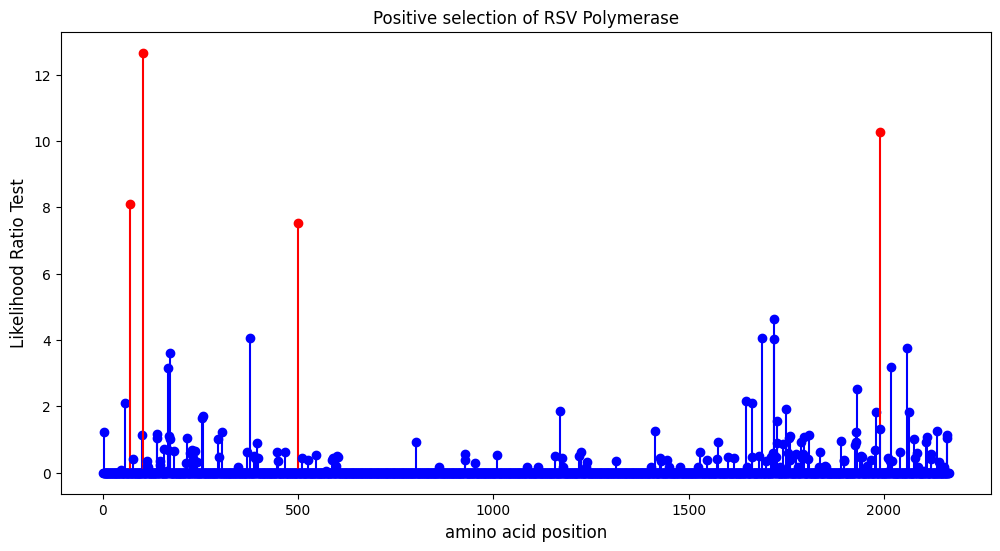

In [11]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color based on the condition (e.g., LRT < 0.05)
colors = ['r' if val < 0.05 else 'b' for val in l['p-value']]

# Plot the lollipop stems with custom colors
for site, lrt, color in zip(l['Site'], l['LRT'], colors):
    ax.stem([site], [lrt], linefmt=f'-{color}', markerfmt='o', basefmt=' ')

# Set labels and title
ax.set_ylabel('Likelihood Ratio Test', fontsize=12)
ax.set_title('Positive selection of RSV Polymerase', fontsize=12)
ax.set_xlabel('amino acid position', fontsize=12)

# Show the plot
plt.show()


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_lollipop(df, condition_column, value_column, p_val, condition_threshold=0.05, title="Lollipop Plot", x_label="X Axis Label", y_label="Y Axis Label", ax=None, save_path=None):
    # Create a figure and axis if ax is not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    # Define a color based on the condition
    colors = ['r' if val < condition_threshold else 'g' for val in df[p_val]]

    # Plot the lollipop stems with custom colors
    for site, value, color in zip(df[condition_column], df[value_column], colors):
        ax.stem([site], [value], linefmt=f'-{color}', markerfmt='o', basefmt=' ')
        

    # Set labels and title
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x_label, fontsize=12)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')


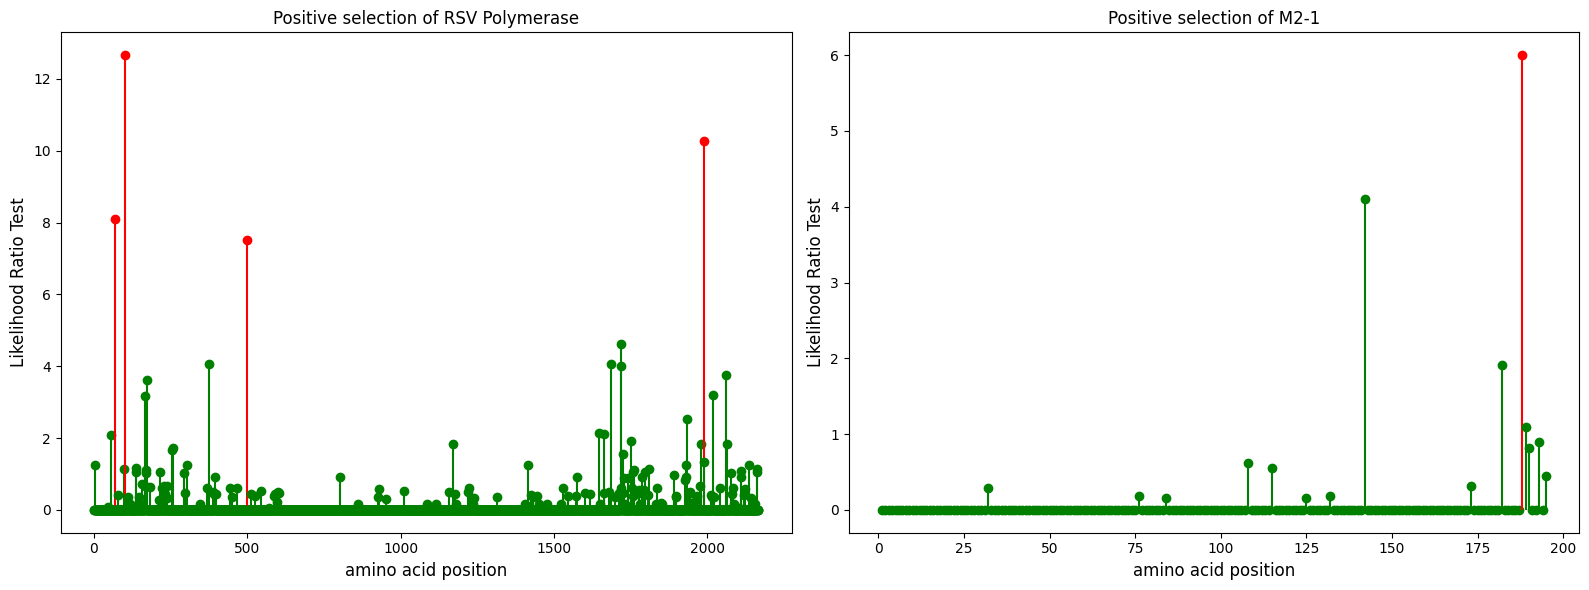

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#plotting MEME for Polymerase
plot_lollipop(l, 'Site', 'LRT', 'p-value', condition_threshold=0.05, title='Positive selection of RSV Polymerase', x_label='amino acid position', y_label='Likelihood Ratio Test', ax=ax1)

# plotting MEME for M2-1
plot_lollipop(m21, 'Site', 'LRT', 'p-value', condition_threshold=0.05, title='Positive selection of M2-1', x_label='amino acid position', y_label='Likelihood Ratio Test', ax=ax2)

plt.tight_layout()
plt.show()


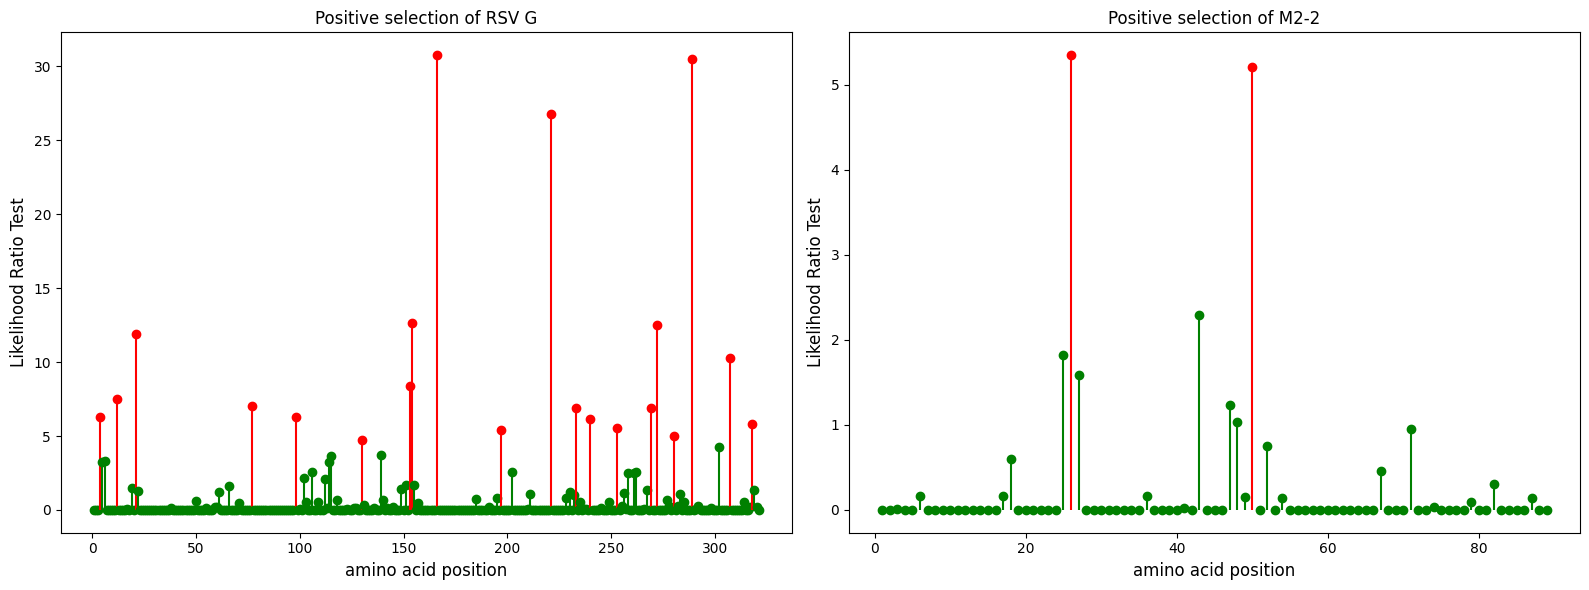

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#plotting MEME for Polymerase
plot_lollipop(g, 'Site', 'LRT', 'p-value', condition_threshold=0.05, title='Positive selection of RSV G', x_label='amino acid position', y_label='Likelihood Ratio Test', ax=ax1)

# plotting MEME for M2-1
plot_lollipop(m22, 'Site', 'LRT', 'p-value', condition_threshold=0.05, title='Positive selection of M2-2', x_label='amino acid position', y_label='Likelihood Ratio Test', ax=ax2)

plt.tight_layout()
plt.show()
